In [135]:
library(tidyverse)
library(philentropy) #distance() has more methods than builtin dist()

STAT 5311
Homework Assignment #7


1. Calculate 3 Similarity Coefficients for Table 1, (Jack, Jim), and (Jim, Mary):

2. Using R examine the violent crime rates by US state using the built in R dataset USArrests compare the results of agglomeration methods average and complete for cluster analysis.


Let Y=1 and P=1 and N=0

|Name |Gender|Fever|Cough|Test-1|Test-2|Test-3|Test-4 |
|-----|------|-----|-----|------|------|------|-------|
|Jack |M     |Y    |N    |P     |N     |N     |N      |       
|Mary |F     |Y    |N    |P     |N     |P     |N      | 
|Jim  |M     |Y    |P    |N     |N     |N     |N      |


In [136]:
data = data.frame( Name = c('Jack','Mary','Jim')
,Gender = c('M', 'F', 'M')
,Fever  = c('Y', 'Y', 'Y')
,Cough  = c('N', 'N', 'P')
,Test_1 = c('P', 'P', 'N')
,Test_2 = c('N', 'N', 'N')
,Test_3 = c('N', 'P', 'N')
,Test_4 = c('N', 'N', 'N'))

In [138]:
#drop symmetric attribute, gender.
#convert to binary : Let Y=1/N=0 and P=1/N=0
jack = c(1,0,1,0,0,0)
jim  = c(1,0,1,0,1,0)
mary = c(1,1,0,0,0,0)

In [139]:
#distance coefficients are based on contingency tables. The diagonals represent matching attributes
jack_jim_contingency = table(jack,jim)
jim_mary_contingency = table(jim,mary)

jack_jim_contingency
jim_mary_contingency

    jim
jack 0 1
   0 3 1
   1 0 2

   mary
jim 0 1
  0 2 1
  1 2 1

In [140]:
#distance() requires a matrix
jack_jim = rbind(jack,jim)
jim_mary = rbind(jim,mary)

In [141]:
methods = c( 'euclidean'
            ,'manhattan'
            ,'jaccard')

In [142]:
#loop through methods
for (m in methods) {
    print(paste( m ,"(Jack , Jim)", "="
                , distance( jack_jim
                           ,method = m)))
    print(paste(m ,"(Jim, Mary)", "="
                , distance( jim_mary
                           ,method = m)))
}

[1] "euclidean (Jack , Jim) = 1"
[1] "euclidean (Jim, Mary) = 1.73205080756888"
[1] "manhattan (Jack , Jim) = 1"
[1] "manhattan (Jim, Mary) = 3"
[1] "jaccard (Jack , Jim) = 0.333333333333333"
[1] "jaccard (Jim, Mary) = 0.75"


In [143]:
#2. 
distance_matrix = dist(USArrests)

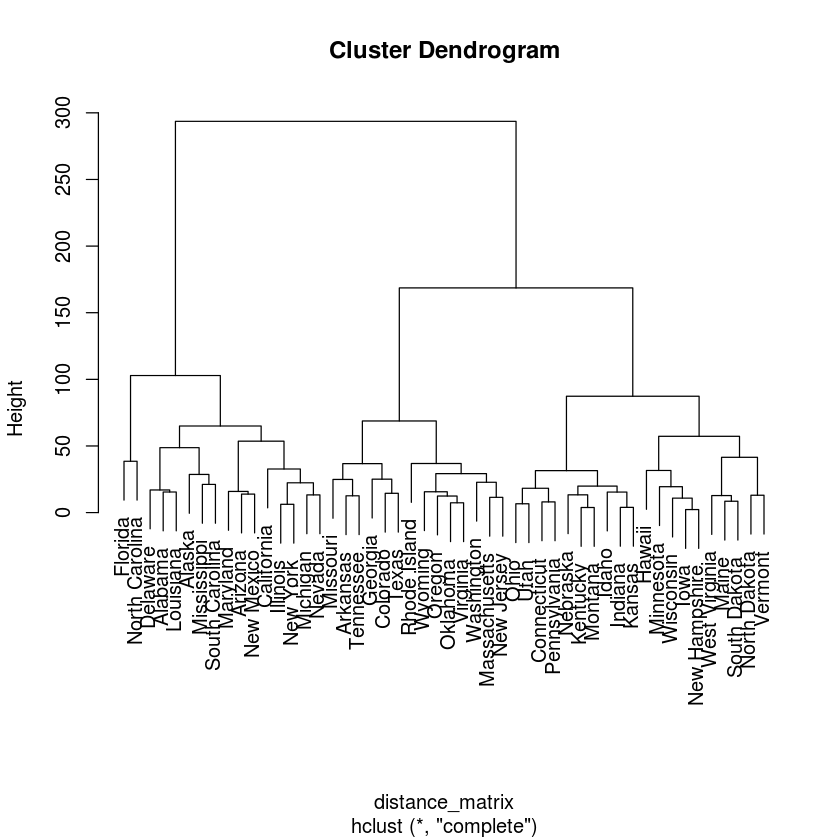

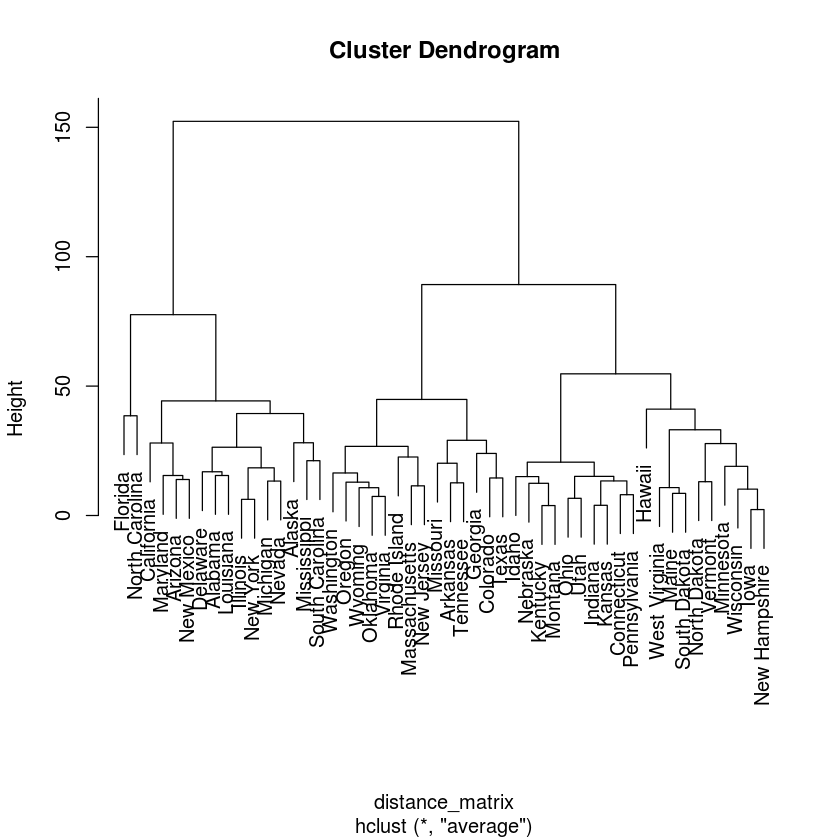

In [145]:
methods = c("complete","average")

#based on visual analysis of dendrogram, 6 clusters seems resonable for both methods 
saved_clusters <- c()
for (m in methods) {
    clusters = hclust(distance_matrix
                      ,method = m)
    plot(clusters)
    clusterCut <- cutree(clusters, 6)
    saved_clusters <- cbind(saved_clusters, clusterCut) 
}


In [151]:
colnames(saved_clusters) <- methods

saved_clusters <- saved_clusters %>% as.data.frame()

#compare methods
table(saved_clusters)

        average
complete  1  2  3  4  5  6
       1 14  0  0  0  0  0
       2  0  6  0  0  0  0
       3  0  0 10  0  0  0
       4  0  0  0  2  0  0
       5  0  0  0  0 10  0
       6  0  0  0  0  0  8

In [149]:
#cluster results for average and complete are the same